In [1]:
import pandas as pd

df = pd.read_csv("user_data.csv")
df = df.drop(["First Name" , "Last Name" , "City" , "State", "Country" , "Education Level"] , axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475688 entries, 0 to 475687
Data columns (total 25 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Gender                                     475688 non-null  object 
 1   Age                                        475688 non-null  int64  
 2   Annual Vacation Days                       475688 non-null  float64
 3   Average Monthly Spend on Entertainment     475688 non-null  float64
 4   Number of Online Purchases in Last Month   475688 non-null  float64
 5   Number of Charity Donations in Last Year   475688 non-null  float64
 6   Average Weekly Exercise Hours              475688 non-null  float64
 7   Investment Portfolio Value                 475688 non-null  float64
 8   Health Consciousness Rating                475688 non-null  float64
 9   Average Daily Screen Time                  475688 non-null  float64
 10  Environm

In [2]:
# One hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns :
  if df[column].dtype == object :
    df[column] = le.fit_transform(df[column])
    
df

,Gender,Age,Annual Vacation Days,Average Monthly Spend on Entertainment,Number of Online Purchases in Last Month,Number of Charity Donations in Last Year,Average Weekly Exercise Hours,Investment Portfolio Value,Health Consciousness Rating,Average Daily Screen Time,...,Financial Wellness Index,Lifestyle Balance Score,Entertainment Engagement Factor,Social Responsibility Index,Work-Life Balance Indicator,Investment Risk Appetite,Eco-Consciousness Metric,Stress Management Score,Time Management Skill,Lifestyle Choice
0,1,49,30.02,0.00,166.0,3.0,0.00,295.63,0.68,5.86,...,100.00,36.49,2.26,0.0,0.49,0.45,0.0,4.93,44.37,3
1,1,43,23.64,7.23,130.0,0.0,2.80,0.00,0.64,3.52,...,100.00,25.72,0.89,0.0,0.54,3.66,0.0,0.78,1.09,0
2,0,37,7.91,8.09,107.0,0.0,0.00,0.00,0.75,6.74,...,70.42,7.14,1.27,0.0,0.00,7.09,0.0,1.16,33.64,11
3,1,22,20.63,6.39,138.0,0.0,0.00,0.00,0.57,5.38,...,103.17,27.14,1.79,0.0,0.00,1.61,0.0,3.06,100.00,1
4,1,38,19.47,7.80,115.0,0.0,0.07,11.50,5.35,6.00,...,100.00,23.31,1.42,0.0,0.27,1.47,0.0,4.07,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475683,1,34,0.88,43.53,100.0,0.0,0.24,11.12,0.00,3.71,...,100.00,0.98,2.20,0.0,0.77,0.73,0.0,2.90,1.11,4
475684,0,24,8.04,42.33,78.0,0.0,0.00,10.16,0.71,1.67,...,100.00,1.03,2.84,0.0,0.00,6.41,0.0,5.98,7.12,2
475685,0,30,21.44,24.24,189.0,0.0,0.00,0.00,0.88,1.59,...,100.00,14.94,1.07,0.0,0.00,0.01,0.0,0.84,3.62,10
475686,0,62,27.87,45.78,115.0,0.0,0.00,1.61,0.77,7.35,...,0.00,32.25,2.08,0.0,0.32,2.04,0.0,4.27,6.10,6


In [3]:
# โหลดข้อมูล
X = df.drop(["Lifestyle Choice"],axis=1)
y = df["Lifestyle Choice"]

In [4]:
from sklearn.model_selection import train_test_split

X_train , X_temp , y_train , y_temp = train_test_split(X,y, test_size=0.3, random_state=24)
X_val , X_test , y_val , y_test = train_test_split(X_temp , y_temp , test_size=0.3,random_state=24)

In [5]:
X_train.shape[0],X_val.shape[0] , X_test.shape[0]

(332981, 99894, 42813)

## LinearSVC Classifier

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(
    StandardScaler(),
    LinearSVC(dual="auto", random_state=24, tol=1e-5)
)
clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(dual='auto', random_state=24, tol=1e-05))])

### Find Best Hyperparameters

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

param_distributions = {
    "linearsvc__C": [0.1, 1, 10, 100],
    "linearsvc__penalty": ["l1", "l2"],
    "linearsvc__loss" : ["hinge" , "squared_hinge"],
    "linearsvc__max_iter" : [10,50,100,500,1000]
}

random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_distributions,
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
model = random_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

val_predictions = random_search.predict(X_test)
val_accuracy = accuracy_score(y_test, val_predictions)
print(f"Validation Accuracy with Best Hyperparameters: {val_accuracy}")

print('Train accuracy' , model.score(X_train,y_train))
print('Test accuracy' ,model.score(X_test,y_test))

/Users/imdev/SornchaiTheDev/lifestyle-prediction/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/imdev/SornchaiTheDev/lifestyle-prediction/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/imdev/SornchaiTheDev/lifestyle-prediction/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/imdev/SornchaiTheDev/lifestyle-prediction/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/imdev/SornchaiTheDev/lifestyle-prediction/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to co

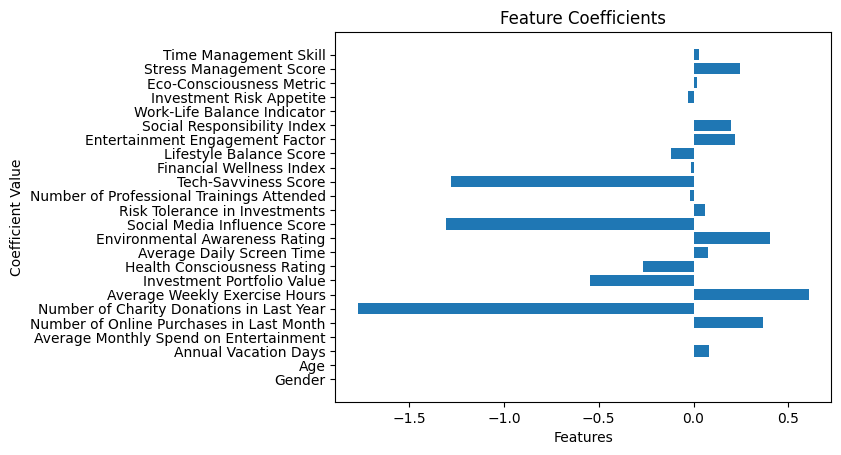

In [ ]:
import matplotlib.pyplot as plt
# Access the LinearSVC instance from the pipeline
linear_svc_model = model.named_steps["linearsvc"]
coefficients = linear_svc_model.coef_[0]
coefficients

plt.barh(X.columns, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.show()

In [ ]:
index = 0
columns = df.columns
features = []
for coefficient in coefficients :
  if coefficient > 0 :
    features.append(columns[index])
  index += 1
features

['Gender',
 'Age',
 'Annual Vacation Days',
 'Average Monthly Spend on Entertainment',
 'Number of Online Purchases in Last Month',
 'Average Weekly Exercise Hours',
 'Average Daily Screen Time',
 'Environmental Awareness Rating',
 'Risk Tolerance in Investments',
 'Entertainment Engagement Factor',
 'Social Responsibility Index',
 'Eco-Consciousness Metric',
 'Stress Management Score',
 'Time Management Skill']

In [ ]:
from sklearn.feature_selection import SelectFromModel

X_train_new = X_train[features]
X_test_new = X_test[features]

original_model = random_search.best_estimator_
new_model = original_model.fit(X_train_new,y_train)

print('Train accuracy' , model.score(X_train_new,y_train))
print('Test accuracy' ,model.score(X_test_new,y_test))

/Users/imdev/SornchaiTheDev/lifestyle-prediction/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6241795716254409

### Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Confusion Matrix :")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Classification Report")
report = classification_report(y_test, y_pred)
print(report)

Confusion Matrix :
[[3581   30    0    8   38    0    5    2    0    0    0    5]
 [   2 3071    0    0    0   10  197    0    4    0   56  212]
 [   0    0 3567    2    0    3    3    8    0   14    0    0]
 [   2    0    1 3421    0    0    0    0   57    0    0    0]
 [  41    0    0    1 3524    7    1    5    0    0   10    1]
 [   0    1    0    2    2 3484   16    4   11    0   12    5]
 [  15  153    1    0    0   30 2740    1   13    0   54  487]
 [   7   61   12    0   16    8  231 2954    0   68  273    2]
 [  29    1    0    0    0    6   46    0 3441    0    7    0]
 [   0    0    5    0    0    0    0    6    0 3580    1    0]
 [  10   26    2    0   11    3   13    7    2    0 3491   18]
 [  14  443    0   20    3   16  156   12    4    0   45 2843]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3669
           1       0.81      0.86      0.84      3552
           2       0.99      0.99      

## Baselines

#### Random Baseline

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

random_prediction = np.random.randint(0,11,size=len(y_test))

accuracy = accuracy_score(y_test,random_prediction)
print("Accuracy :",accuracy)

Accuracy : 0.08382967790157195


#### Zero Rule

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

zero_rule_baseline = DummyClassifier(strategy='most_frequent')
zero_rule_baseline.fit(X_train, y_train)

zero_rule_predictions = zero_rule_baseline.predict(X_test)

zero_rule_accuracy = accuracy_score(y_test, zero_rule_predictions)
print("Accuracy :", zero_rule_accuracy)

Accuracy : 0.08296545441805059
